In [2]:
import os
os.environ["TRANSFORMERS_NO_TF"] = "1"


In [3]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW  # ✅ Corrected AdamW import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [4]:
df = pd.read_csv(r"C:\Users\sajal\Desktop\NLP Project_updated\Mental_Health_Dataset__4000_entries_.csv").dropna()

# Label encoding
label_encoder = LabelEncoder()
df['label_id'] = label_encoder.fit_transform(df['label'])

label2id = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
id2label = {v: k for k, v in label2id.items()}


In [5]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(), df['label_id'].tolist(), test_size=0.2, random_state=42
)


In [6]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class MentalHealthDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
        self.labels = torch.tensor(labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = MentalHealthDataset(train_texts, train_labels)
val_dataset = MentalHealthDataset(val_texts, val_labels)


In [7]:
# ✅ Convert both keys and values to native Python int (not numpy types)
label2id = {str(label): int(idx) for label, idx in label2id.items()}
id2label = {int(idx): str(label) for idx, label in id2label.items()}

# ✅ Load pretrained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

# ✅ Setup device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [8]:
# ✅ Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# ✅ Set up the optimizer (AdamW from torch)
optimizer = AdamW(model.parameters(), lr=2e-5)



🚀 Epoch 1/5


Training: 100%|██████████| 200/200 [00:15<00:00, 12.98it/s]


✅ Avg Training Loss: 0.2275


Validating: 100%|██████████| 50/50 [00:00<00:00, 72.45it/s]


🔍 Validation Loss     : 0.0097
🎯 Accuracy            : 1.0000
🧪 Precision (weighted): 1.0000
🔁 Recall (weighted)   : 1.0000
📈 F1 Score (weighted) : 1.0000
🕒 Epoch Time: 16.11 seconds
💾 Saving Best Model (F1: 1.0000) to mental_health_bert_model_best

🚀 Epoch 2/5


Training: 100%|██████████| 200/200 [00:14<00:00, 13.73it/s]


✅ Avg Training Loss: 0.0074


Validating: 100%|██████████| 50/50 [00:00<00:00, 69.43it/s]


🔍 Validation Loss     : 0.0030
🎯 Accuracy            : 1.0000
🧪 Precision (weighted): 1.0000
🔁 Recall (weighted)   : 1.0000
📈 F1 Score (weighted) : 1.0000
🕒 Epoch Time: 15.30 seconds

🚀 Epoch 3/5


Training: 100%|██████████| 200/200 [00:14<00:00, 13.68it/s]


✅ Avg Training Loss: 0.0031


Validating: 100%|██████████| 50/50 [00:00<00:00, 72.42it/s]


🔍 Validation Loss     : 0.0016
🎯 Accuracy            : 1.0000
🧪 Precision (weighted): 1.0000
🔁 Recall (weighted)   : 1.0000
📈 F1 Score (weighted) : 1.0000
🕒 Epoch Time: 15.32 seconds

🚀 Epoch 4/5


Training: 100%|██████████| 200/200 [00:14<00:00, 13.60it/s]


✅ Avg Training Loss: 0.0019


Validating: 100%|██████████| 50/50 [00:00<00:00, 71.29it/s]


🔍 Validation Loss     : 0.0010
🎯 Accuracy            : 1.0000
🧪 Precision (weighted): 1.0000
🔁 Recall (weighted)   : 1.0000
📈 F1 Score (weighted) : 1.0000
🕒 Epoch Time: 15.42 seconds

🚀 Epoch 5/5


Training: 100%|██████████| 200/200 [00:14<00:00, 13.74it/s]


✅ Avg Training Loss: 0.0013


Validating: 100%|██████████| 50/50 [00:00<00:00, 70.84it/s]


🔍 Validation Loss     : 0.0007
🎯 Accuracy            : 1.0000
🧪 Precision (weighted): 1.0000
🔁 Recall (weighted)   : 1.0000
📈 F1 Score (weighted) : 1.0000
🕒 Epoch Time: 15.28 seconds


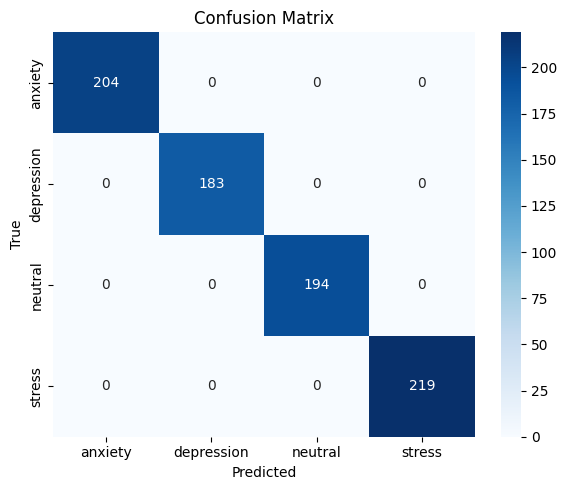


📋 Classification Report:
              precision    recall  f1-score   support

     anxiety       1.00      1.00      1.00       204
  depression       1.00      1.00      1.00       183
     neutral       1.00      1.00      1.00       194
      stress       1.00      1.00      1.00       219

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



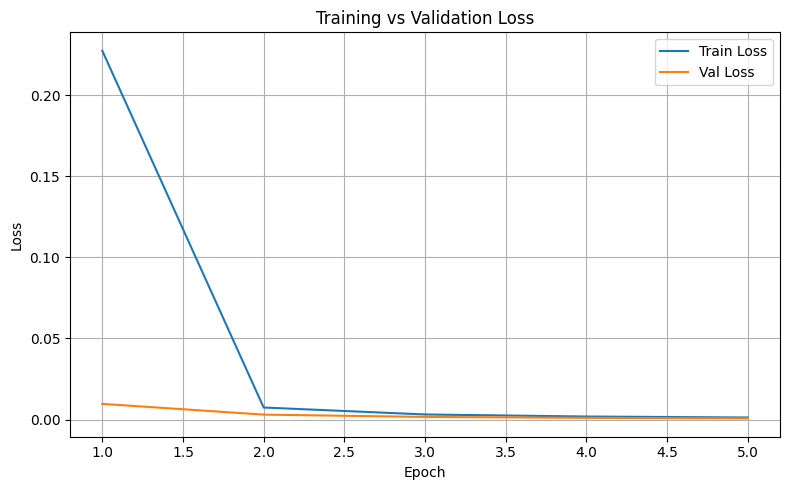


📊 Per-Class Accuracy:
anxiety     : 1.0000
depression  : 1.0000
neutral     : 1.0000
stress      : 1.0000


In [9]:
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# 🔧 Training Configuration
num_epochs = 5
best_val_f1 = 0
model_save_path = "mental_health_bert_model_best"
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    print(f"\n🚀 Epoch {epoch+1}/{num_epochs}")
    start_time = time.time()

    # === TRAINING ===
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_loader, desc="Training"):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"✅ Avg Training Loss: {avg_train_loss:.4f}")

    # === VALIDATION ===
    model.eval()
    total_val_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validating"):
            batch = {k: v.to(device) for k, v in batch.items()}
            labels = batch["labels"]
            outputs = model(**batch)
            loss = outputs.loss
            total_val_loss += loss.item()

            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # === METRICS ===
    acc = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")

    print(f"🔍 Validation Loss     : {avg_val_loss:.4f}")
    print(f"🎯 Accuracy            : {acc:.4f}")
    print(f"🧪 Precision (weighted): {precision:.4f}")
    print(f"🔁 Recall (weighted)   : {recall:.4f}")
    print(f"📈 F1 Score (weighted) : {f1:.4f}")

    # === TIME TRACKING ===
    end_time = time.time()
    print(f"🕒 Epoch Time: {end_time - start_time:.2f} seconds")

    # === SAVE BEST ===
    if f1 > best_val_f1:
        best_val_f1 = f1
        print(f"💾 Saving Best Model (F1: {f1:.4f}) to {model_save_path}")
        model.save_pretrained(model_save_path)
        tokenizer.save_pretrained(model_save_path)

# === FINAL EVALUATION ===

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = list(model.config.id2label.values())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Train vs Validation Loss Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Per-Class Accuracy
labels_np = np.array(all_labels)
preds_np = np.array(all_preds)
print("\n📊 Per-Class Accuracy:")
for i, label in enumerate(class_names):
    mask = labels_np == i
    class_acc = accuracy_score(labels_np[mask], preds_np[mask])
    print(f"{label:<12}: {class_acc:.4f}")
